In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/nithe/OneDrive/Desktop/UMBC/IS_Sem_2/IS_733/Classwork/hamspam.csv')

# Convert categorical data to numerical
data['Contains Link'] = data['Contains Link'].map({'Yes': 1, 'No': 0})
data['Contains Money Words'] = data['Contains Money Words'].map({'Yes': 1, 'No': 0})
data['Length'] = data['Length'].map({'Long': 1, 'Short': 0})
data['Class'] = data['Class'].map({'Spam': 1, 'Ham': 0})

# Features and target
X = data[['Contains Link', 'Contains Money Words', 'Length']]
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# KNN Classifier (K=2)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy (K=2):", accuracy_knn)

Naive Bayes Accuracy: 0.535
KNN Accuracy (K=2): 0.535


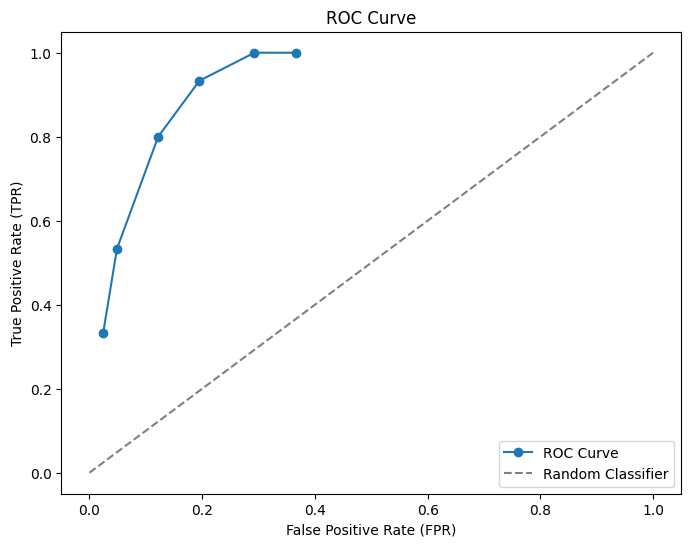

In [19]:
import matplotlib.pyplot as plt

# Data points for FPR and TPR from the table
fpr = [0.0244, 0.0488, 0.1219, 0.1951, 0.2927, 0.3660]
tpr = [0.3333, 0.5333, 0.8000, 0.9333, 1.0000, 1.0000]

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label='ROC Curve')

# Adding labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')

# Adding a diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

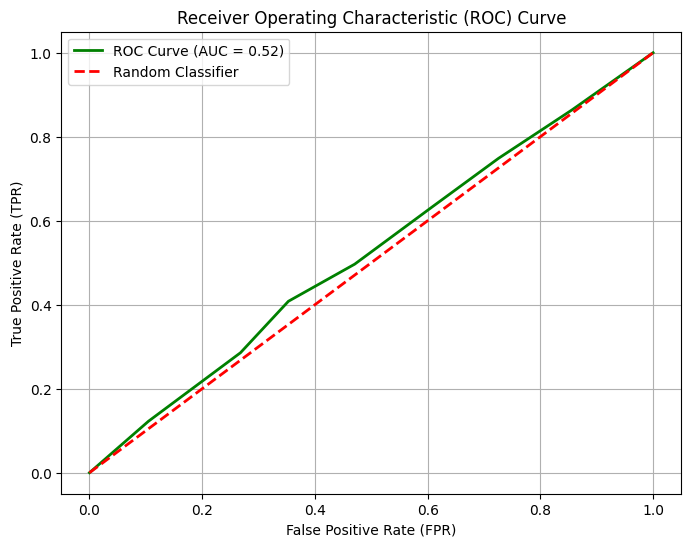

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def load_and_preprocess_data(file_path):

    dataset = pd.read_csv(file_path)
    
    # Map categorical features to numerical values
    dataset['Contains Link'] = dataset['Contains Link'].map({'Yes': 1, 'No': 0})
    dataset['Contains Money Words'] = dataset['Contains Money Words'].map({'Yes': 1, 'No': 0})
    dataset['Length'] = dataset['Length'].map({'Long': 1, 'Short': 0})
    
    return dataset

def split_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def train_naive_bayes(X_train, y_train):
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model

def plot_roc_curve(y_true, y_pred_prob):
    # Calculate ROC curve and AUC
    false_positive_rate, true_positive_rate, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(false_positive_rate, true_positive_rate, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

def main():
    # Load and preprocess the data
    file_path = "C:/Users/nithe/OneDrive/Desktop/UMBC/IS_Sem_2/IS_733/Classwork/hamspam.csv"
    data = load_and_preprocess_data(file_path)
    
    # Define features and target
    features = data[['Contains Link', 'Contains Money Words', 'Length']]
    target = data['Class'].map({'Spam': 1, 'Ham': 0})
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(features, target)
    
    # Train the Naive Bayes model
    model = train_naive_bayes(X_train, y_train)
    
    # Predict probabilities for the test set
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Plot the ROC curve
    plot_roc_curve(y_test, y_pred_prob)

if __name__ == "__main__":
    main()